In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50, 501)

In [3]:
#x

In [4]:
y = np.sin(x)

In [5]:
#y

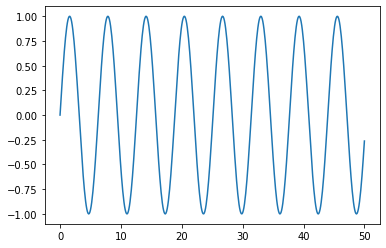

In [6]:
plt.plot(x,y)

In [7]:
df = pd.DataFrame(data=y, index=x, columns=["Sine"])

In [8]:
len(df)

501

In [9]:
test_percent = 0.1

In [10]:
test_point = np.round(len(df)*test_percent)

In [11]:
test_point

50.0

In [12]:
test_ind = int(len(df)-test_point)

In [13]:
test_ind

451

In [14]:
train = df.iloc[:test_ind]

In [15]:
train

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [16]:
test = df.iloc[test_ind:]

In [17]:
#test

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [21]:
scaled_train = scaler.transform(train)

In [22]:
scaled_test = scaler.transform(test)

In [23]:
#scaled_test

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [26]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train, scaled_train,
                               length=length,
                               batch_size = batch_size)

In [27]:
type(generator)

tensorflow.python.keras.preprocessing.sequence.TimeseriesGenerator

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [29]:
n_features = 1

In [30]:
model = Sequential()

model.add(SimpleRNN(50, input_shape=(length,n_features)))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit_generator(generator, epochs=5)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 401 steps
Epoch 1/5
401/401 [==============================] - 4s 9ms/step - loss: 0.0038
Epoch 2/5
401/401 [==============================] - 3s 7ms/step - loss: 1.5634e-04
Epoch 3/5
401/401 [==============================] - 3s 7ms/step - loss: 7.3847e-05
Epoch 4/5
401/401 [==============================] - 3s 7ms/step - loss: 5.7999e-04
Epoch 5/5
401/401 [==============================] - 3s 7ms/step - loss: 1.7703e-05


In [33]:
losses = pd.DataFrame(model.history.history)

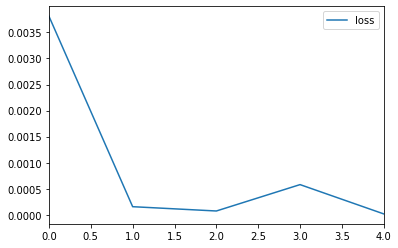

In [34]:
losses.plot()

In [35]:
first_eval_batch =scaled_train[-length:]

In [36]:
first_eval_batch = first_eval_batch.reshape((1,length,n_features))

In [37]:
model.predict(first_eval_batch)

array([[0.9534924]], dtype=float32)

In [38]:
test_predictions = []
first_eval_batch =scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [44]:
# predicted_value = [[[99]]]
# np.append(current_batch[:,1:,:],[[[0.99]]],axis=1)

In [47]:
test_predictions = []
first_eval_batch =scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    
    current_pred = model.predict((current_batch))[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [48]:
test_predictions

[array([0.9534924], dtype=float32),
 array([0.97564757], dtype=float32),
 array([0.99272335], dtype=float32),
 array([1.0053306], dtype=float32),
 array([1.012718], dtype=float32),
 array([1.0149213], dtype=float32),
 array([1.0114188], dtype=float32),
 array([1.0021182], dtype=float32),
 array([0.98780483], dtype=float32),
 array([0.96839565], dtype=float32),
 array([0.94358504], dtype=float32),
 array([0.91418064], dtype=float32),
 array([0.88022137], dtype=float32),
 array([0.84217054], dtype=float32),
 array([0.80064523], dtype=float32),
 array([0.7560388], dtype=float32),
 array([0.7084911], dtype=float32),
 array([0.65855026], dtype=float32),
 array([0.60664546], dtype=float32),
 array([0.55334836], dtype=float32),
 array([0.49896103], dtype=float32),
 array([0.44387966], dtype=float32),
 array([0.3888539], dtype=float32),
 array([0.3344914], dtype=float32),
 array([0.2815756], dtype=float32),
 array([0.230653], dtype=float32),
 array([0.18246442], dtype=float32),
 array([0.13790

In [49]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],
